In [1]:
# rasterio package is for openning GeoTIFF files
# https://mapbox.github.io/rasterio/installation.html
# go to that page for installation instructions

import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

We have a satellite image of the crop fields in the US.

Date: 2016-08-06T17:28:01.000Z

<img src='images/image.png'>

Also, we have a ground truth mapping for different crop cultures.

<img src='images/crops.png'>

In [2]:
# load the data
crops = rasterio.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif').read(1)
band_01 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_01.tif').read(1)
band_02 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_02.tif').read(1)
band_03 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_03.tif').read(1)
band_04 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_04.tif').read(1)
band_05 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_05.tif').read(1)
band_06 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_06.tif').read(1)
band_07 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_07.tif').read(1)
band_08 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_08.tif').read(1)
band_8A = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif').read(1)
band_09 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_09.tif').read(1)
band_10 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_10.tif').read(1)
band_11 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_11.tif').read(1)
band_12 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_12.tif').read(1)

In [3]:
# check shapes
print(crops.shape)
print(band_01.shape)

(2724, 3816)
(2724, 3816)


The size of the image is 2724x3816 pixels. The satellite image consists of several layers, so-called 'bands' (each band corresponds to different image frequences). In this particullar example for simplicity reasons, I've downloaded only 4 bands, but there are 13 bands exist in total, which can be used for our task.

We will start from pixel-based classification, i.e. we have 2724x3816 pixels that are our objects to classify. Each pixel has 13 values (for different bands) that will compose our feature space. Also, based on these 13 values, different indexes can be calculated, for exapmle, NDVI vegetation index (it is related to features generation task). So, the feature space can be expanded.

For each pixel we have the ground truth labels, which represent different crop cultures. The labels are shown below. In this case, there are 36 different crops cultures, i.e. classes. So, the goal is to predict to which class each of the pixels on the satellite image belongs.

In [4]:
labels = np.unique(crops)
print(labels)
print('Total number of classes:', len(labels))

[  1   4   5   6  21  22  23  24  27  28  29  31  36  37  39  41  42  43
  44  53  58  59  61 111 121 122 123 124 131 141 142 143 152 176 190 195]
Total number of classes: 36


Below we are loading the CSV file with pixels' statistics, which also show the correspondance between labels and crops.

In [5]:
statistics = pd.read_csv('statistics.csv')

In [6]:
statistics

,Value,Category,Count,Acreage
0,1,Corn,183792,40874.4
1,4,Sorghum,6,1.3
2,5,Soybeans,350492,77947.5
3,6,Sunflowers,9106,2025.1
4,21,Barley,8371,1861.7
5,22,Durum Wheat,336,74.7
6,23,Spring Wheat,288999,64271.8
7,24,Winter Wheat,667,148.3
8,27,Rye,26,5.8
9,28,Oats,709,157.7


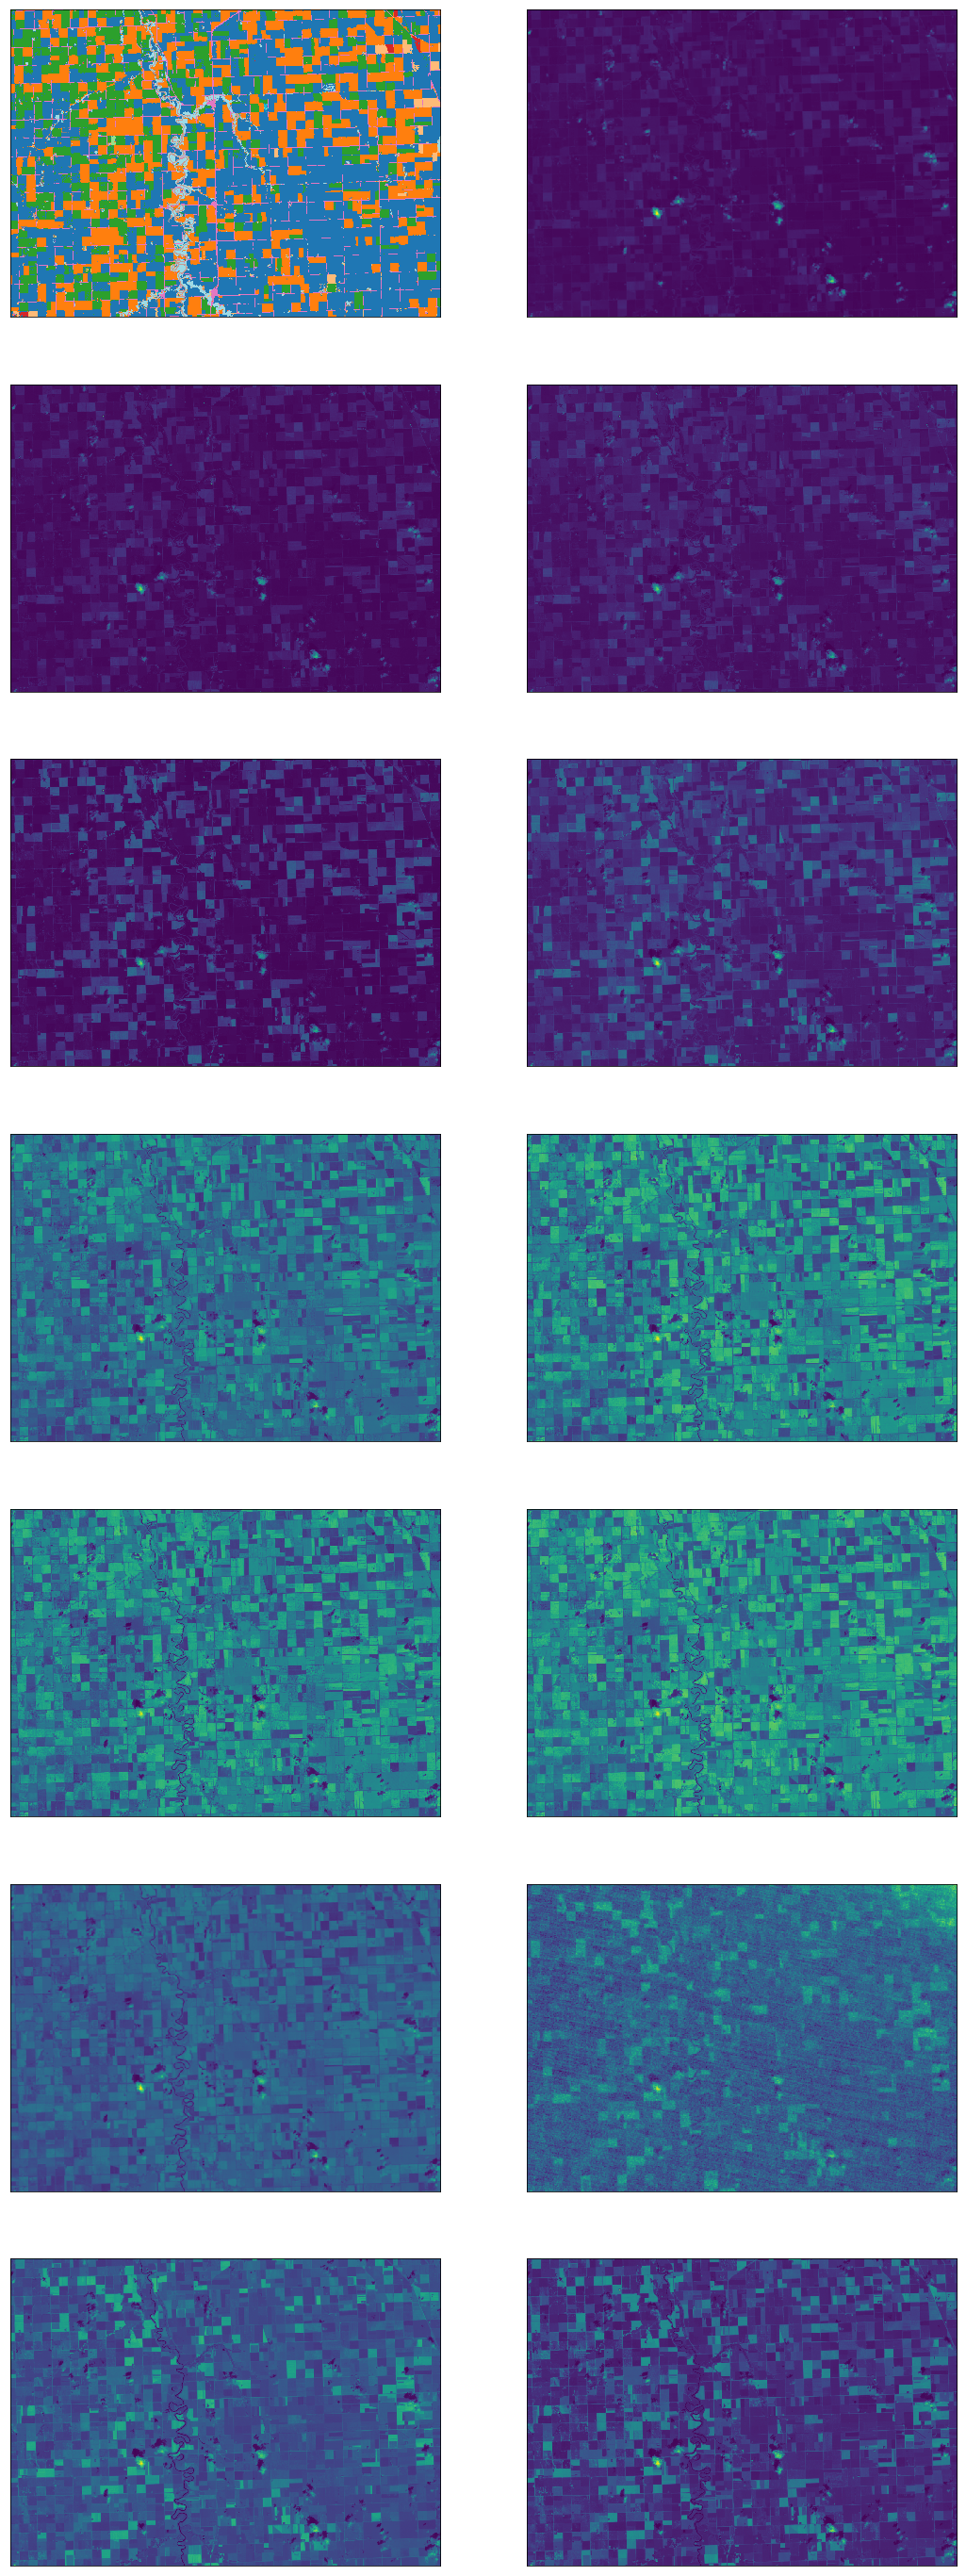

In [7]:
plt.figure(figsize=(18,50))
plt.subplot(7,2,1)
plt.imshow(crops, cmap='tab20')
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,2)
plt.imshow(band_01)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,3)
plt.imshow(band_02)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,4)
plt.imshow(band_03)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,5)
plt.imshow(band_04)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,6)
plt.imshow(band_05)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,7)
plt.imshow(band_06)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,8)
plt.imshow(band_07)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,9)
plt.imshow(band_08)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,10)
plt.imshow(band_8A)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,11)
plt.imshow(band_09)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,12)
plt.imshow(band_10)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,13)
plt.imshow(band_11)
plt.xticks([])
plt.yticks([])
plt.subplot(7,2,14)
plt.imshow(band_12)
plt.xticks([])
plt.yticks([])
plt.show()

# Example 2-class classification (Spring Wheat vs. Corn)

In [8]:
example = np.zeros_like(crops)
example[np.where(crops==1)] = 1 # corn
example[np.where(crops==23)] = 2 # wheat

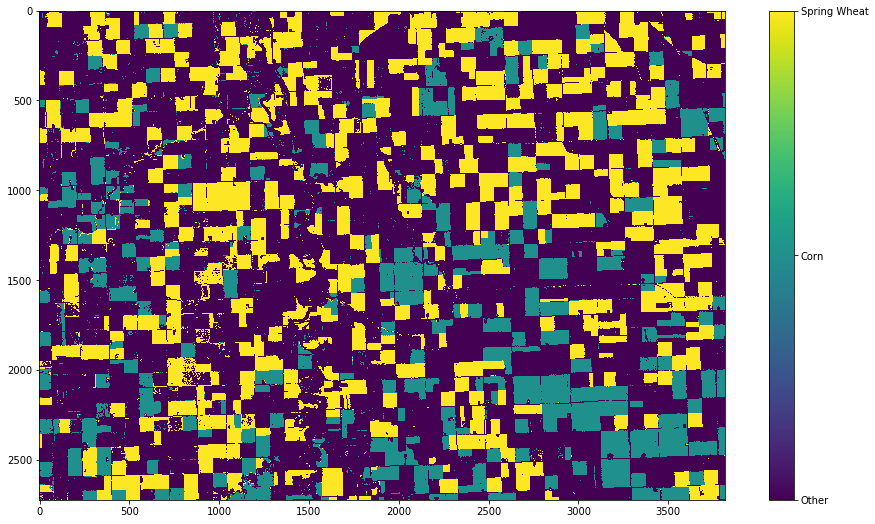

In [9]:
plt.figure(figsize=(16,9))
plt.imshow(example)
cbar = plt.colorbar(ticks=[2,1,0])
cbar.ax.set_yticklabels(['Spring Wheat', 'Corn', 'Other']) 
plt.show()

In [10]:
# create input and target spaces
X_corn = np.stack([band_01[np.where(crops==1)], band_02[np.where(crops==1)], band_03[np.where(crops==1)],
              band_04[np.where(crops==1)], band_05[np.where(crops==1)], band_06[np.where(crops==1)],
              band_07[np.where(crops==1)], band_08[np.where(crops==1)], band_8A[np.where(crops==1)],
              band_09[np.where(crops==1)], band_10[np.where(crops==1)], band_11[np.where(crops==1)], 
              band_12[np.where(crops==1)]], axis=1)

X_wheat = np.stack([band_01[np.where(crops==23)], band_02[np.where(crops==23)], band_03[np.where(crops==23)],
              band_04[np.where(crops==23)], band_05[np.where(crops==23)], band_06[np.where(crops==23)],
              band_07[np.where(crops==23)], band_08[np.where(crops==23)], band_8A[np.where(crops==23)],
              band_09[np.where(crops==23)], band_10[np.where(crops==23)], band_11[np.where(crops==23)], 
              band_12[np.where(crops==23)]], axis=1)

X = np.concatenate([X_corn, X_wheat])
y = np.concatenate([[1]*len(X_corn), [2]*len(X_wheat)])

In [11]:
print(X.shape)
print(y.shape)

(4253190, 13)
(4253190,)


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [43]:
X_train.shape

(850638, 13)

In [44]:
clf = DecisionTreeClassifier()
cross_val_score(clf, X_train, y_train)

array([0.98063813, 0.98050757, 0.98059567])